In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
%matplotlib inline

# Ex1

*by: Madeleine Ekblom, Matias Jääskeläinen, Jakub Kubečka*

Time used: h min

## Problem 1

In [4]:
iters = 1000

### a)  
sampling 100 numbers from normal distribution $N(2,1)$ with `numpy`

In [5]:
x_normal = np.random.normal(2,1,iters)

### b)
sampling 100 numbers by MH algorithm. $\mu=2$, $\epsilon=0.5$ and $x_0 = 4.2$

In [6]:
x_arr = np.zeros(iters+1)

x_arr[0] = 42

In [7]:
def logprob(x,mu):
    return -(x-mu)**2/2/np.log(np.sqrt(2*np.pi))

**The Metropolis-Hastings algorithm**

In [8]:
for i in range(1,iters+1):
    x_prime = np.random.normal(2,0.5,1)
    P_x_prev = logprob(x_arr[i-1],2)
    P_x_prime = logprob(x_prime,2)
    r = np.minimum(0,P_x_prime-P_x_prev)
    r_prime = np.log(np.random.uniform())
    if r_prime <= r:
        x_arr[i] = x_prime
    else:
        x_arr[i] = x_arr[i-1]

> check the zero division error

### c)

Plot histograms of the sampled distributions

In [9]:
bins = list(np.linspace(-1,5,25))

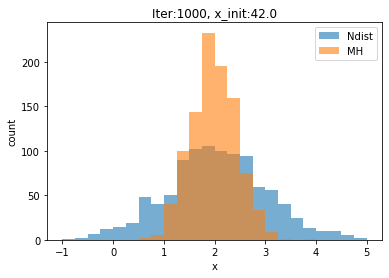

In [10]:
plt.hist(x_normal,bins=bins,label="Ndist",alpha=0.6)
plt.hist(x_arr,bins=bins,label="MH",alpha=0.6)
plt.legend()
plt.xlabel("x")
plt.ylabel("count")
plt.title("Iter:{}, x_init:{}".format(iters,x_arr[0]))
plt.savefig("iter{}x_init{}.png".format(iters,x_arr[0]))

![100](./iter100x_init4.2.png)

![1000](./iter1000x_init42.0.png)

> Update pictures

## Problem 2

### a)

In [11]:
!head -n 1 npf_train_full.csv

id,date,event,partlybad,HYY_META.CO2168.mean,HYY_META.CO2168.std,HYY_META.CO2336.mean,HYY_META.CO2336.std,HYY_META.CO242.mean,HYY_META.CO242.std,HYY_META.CO2504.mean,HYY_META.CO2504.std,HYY_META.Glob.mean,HYY_META.Glob.std,HYY_META.H2O168.mean,HYY_META.H2O168.std,HYY_META.H2O336.mean,HYY_META.H2O336.std,HYY_META.H2O42.mean,HYY_META.H2O42.std,HYY_META.H2O504.mean,HYY_META.H2O504.std,HYY_META.H2O672.mean,HYY_META.H2O672.std,HYY_META.H2O84.mean,HYY_META.H2O84.std,HYY_META.NET.mean,HYY_META.NET.std,HYY_META.NO168.mean,HYY_META.NO168.std,HYY_META.NO336.mean,HYY_META.NO336.std,HYY_META.NO42.mean,HYY_META.NO42.std,HYY_META.NO504.mean,HYY_META.NO504.std,HYY_META.NO672.mean,HYY_META.NO672.std,HYY_META.NO84.mean,HYY_META.NO84.std,HYY_META.NOx168.mean,HYY_META.NOx168.std,HYY_META.NOx336.mean,HYY_META.NOx336.std,HYY_META.NOx42.mean,HYY_META.NOx42.std,HYY_META.NOx504.mean,HYY_META.NOx504.std,HYY_META.NOx672.mean,HYY_META.NOx672.std,HYY_META.NOx84.mean,HYY_META.NOx84.std,HYY_META.O3168.mean,HYY_META

In [12]:
!tail -n 1 npf_train_full.csv

724,2011-08-19,nonevent,FALSE,383.698145695364,8.41835109776843,384.052631578947,8.1303885635616,386.4368,9.90153634069176,384.105592105263,7.95293587620714,332.744477611941,243.722644610723,10.9465562913907,0.96944454636499,10.7603289473684,0.97461041139059,11.3288590604027,0.963614767005468,10.6419078947368,0.972328218065212,10.5509271523179,0.966246587570259,11.1830463576159,0.97254853752224,233.307016129032,222.197399642324,0.0576129032258064,0.0813768200743471,0.0592356687898089,0.0922617611241827,0.040516129032258,0.0581957461335035,0.0569871794871794,0.0872106820313916,0.0566666666666666,0.0813462002866469,0.0396153846153846,0.0701416503699857,0.452709677419355,0.528702540380166,0.451656050955414,0.510171975948581,0.409677419354838,0.443383419068627,0.423589743589744,0.528896536888678,0.366858974358974,0.382359068681275,0.426730769230769,0.470985464417223,28.490641025641,6.29622249058523,25.9176923076923,6.56013826035985,30.1044585987261,6.50199913980155,30.7582692307692,6.44457

### b)

In [13]:
!wc -l npf_train_full.csv

725 npf_train_full.csv


### c)

In [2]:
!sed  $'s/,/\t/g' npf_train_full.csv > npf_train_full.tsv

> for linux
```bash
sed 's/,/\t/g' npf_train_full.csv > npf_train_full.tsv
```

### d)

In [3]:
!awk 'NR==1 {for(i=1;i<=NF;i++){f[$i]=i}}{if (NR>1) {print $(f["event"])}}' npf_train_full.tsv | sort -u

II
Ia
Ib
nonevent


## Problem 3

In [16]:
npf_df = pd.read_csv("npf_train_full.csv")

In [17]:
npf_df.set_index("id",inplace=True)

Printing the first lines of the DF

In [18]:
npf_df.head()

,date,event,partlybad,HYY_META.CO2168.mean,HYY_META.CO2168.std,HYY_META.CO2336.mean,HYY_META.CO2336.std,HYY_META.CO242.mean,HYY_META.CO242.std,HYY_META.CO2504.mean,...,HYY_META.WS42.mean,HYY_META.WS42.std,HYY_META.WS504.mean,HYY_META.WS504.std,HYY_META.WS672.mean,HYY_META.WS672.std,HYY_META.WS84.mean,HYY_META.WS84.std,CS.mean,CS.std
id,,,,,,,,,,,,,,,,,,,,,
1,2000-01-23,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,...,0.610911,0.241239,4.919484,0.850927,5.704570,1.013961,1.303071,0.470907,0.000764,0.000048
2,2000-01-25,nonevent,False,381.752738,1.701439,381.392651,1.573735,382.373735,1.754803,380.980000,...,0.524010,0.253737,4.262110,1.078909,5.504072,1.253714,0.945525,0.398927,0.003630,0.000650
3,2000-02-13,nonevent,False,376.723579,0.468817,376.660842,0.466072,377.282447,0.498498,376.628105,...,1.176977,0.431637,5.907152,1.121994,6.234664,1.068698,2.264736,0.733461,0.005318,0.000479
4,2000-02-17,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,...,0.215000,0.181921,1.033591,0.411619,1.167414,0.388698,0.504209,0.315966,0.002038,0.000751
5,2000-02-23,nonevent,False,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,380.296466,...,0.151757,0.108344,0.374667,0.315273,0.340794,0.917893,0.184711,0.130753,0.002546,0.000686


###  c)

In [19]:
npf_df.drop("partlybad",axis='columns',inplace=True)

In [20]:
npf_df.describe()

,HYY_META.CO2168.mean,HYY_META.CO2168.std,HYY_META.CO2336.mean,HYY_META.CO2336.std,HYY_META.CO242.mean,HYY_META.CO242.std,HYY_META.CO2504.mean,HYY_META.CO2504.std,HYY_META.Glob.mean,HYY_META.Glob.std,...,HYY_META.WS42.mean,HYY_META.WS42.std,HYY_META.WS504.mean,HYY_META.WS504.std,HYY_META.WS672.mean,HYY_META.WS672.std,HYY_META.WS84.mean,HYY_META.WS84.std,CS.mean,CS.std
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,724.000000,724.000000
mean,381.658324,3.489664,381.673616,3.275027,382.655005,4.371095,381.577211,3.072423,185.514670,138.181756,...,0.688521,0.381446,4.373448,1.352006,4.803624,1.432461,1.212301,0.645490,0.003201,0.000693
std,11.258353,3.462871,11.221999,3.204495,10.871322,4.560481,11.226013,2.927460,123.826173,92.800204,...,0.310996,0.131977,1.594486,0.430355,1.768055,0.434073,0.554331,0.227427,0.002361,0.000619
min,356.526871,0.104654,356.796486,0.121059,359.795102,0.152663,356.841429,0.127037,3.719434,1.997962,...,0.143918,0.108344,0.374667,0.315273,0.340794,0.388698,0.184711,0.130753,0.000343,0.000027
25%,373.312402,0.960250,373.325678,0.933541,375.020899,1.076982,373.315253,0.883475,66.460780,42.722983,...,0.487022,0.291131,3.230292,1.074888,3.491357,1.131123,0.823859,0.492820,0.001539,0.000272
50%,380.963558,2.209440,380.973339,2.178880,382.073269,2.680883,380.851264,2.082948,182.624288,144.420346,...,0.626884,0.356229,4.261883,1.291357,4.682412,1.353102,1.086072,0.614442,0.002568,0.000515
75%,388.683335,4.852608,388.749373,4.564792,389.354659,6.168411,388.648751,4.238526,295.071365,222.603500,...,0.823015,0.452122,5.289124,1.560051,5.752943,1.606556,1.496664,0.771615,0.004243,0.000883
max,413.101159,20.960630,413.176522,19.351218,413.024493,40.366704,413.217353,17.384845,449.450545,320.099476,...,1.804491,0.799629,9.109659,3.099174,9.979648,3.280108,2.956898,1.533635,0.019094,0.004676


Plotting scatterplot matrix

In [ ]:
import seaborn as sns
sns.pairplot(npf_df.iloc[:,2:12])

plt.figure()
for i in range(2,12):
    plt.subplot(2,5,i-1)
    sns.boxplot(x="event", y=npf_df.iloc[:,i],data=npf_df)

for i in range(2,12):
    plt.figure()
    sns.boxplot(x="event", y=npf_df.iloc[:,i],data=npf_df)
    plt.savefig("{}.png".format(npf_df.columns[i]))

In [42]:
npf_df["isevent"] = npf_df.event.values != "nonevent"

In [43]:
np.sum(npf_df.isevent)

330

([<matplotlib.axis.XTick at 0x7fb7c05880d0>,
 <a list of 2 Text xticklabel objects>)

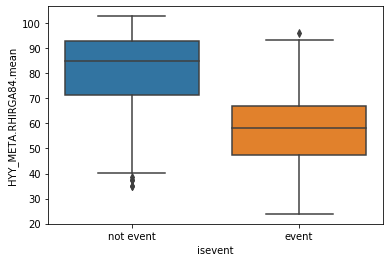

In [44]:
sns.boxplot(x="isevent", y=npf_df["HYY_META.RHIRGA84.mean"],data=npf_df)
plt.xticks(ticks=[False,True],labels=["not event","event"])

Text(0.5, 0.98, 'HYY_META.CO2168.mean')

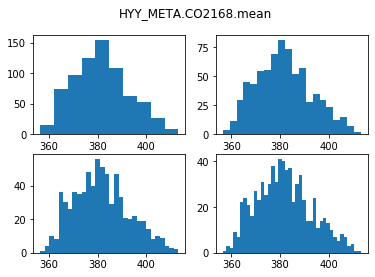

In [33]:
plt.figure()
#plt.subplots(2,2)
col = 2
#print(npf_df.columns[col])
plt.subplot(2,2,1)
plt.hist(x=npf_df.iloc[:,col],bins=10);#,data=npf_df)
plt.subplot(2,2,2)
plt.hist(x=npf_df.iloc[:,col],bins=20);#,data=npf_df)
plt.subplot(2,2,3)
plt.hist(x=npf_df.iloc[:,col],bins=30);#,data=npf_df)
plt.subplot(2,2,4)
plt.hist(x=npf_df.iloc[:,col],bins=40);#,data=npf_df)
plt.suptitle(npf_df.columns[col])

In [45]:
npf_df["datetime"] = pd.to_datetime(npf_df.date)

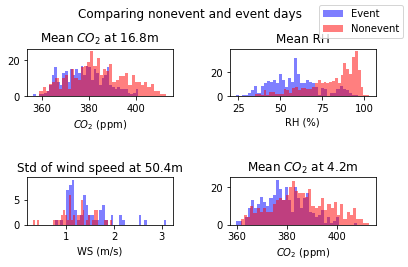

In [41]:
# Divide data into nonevent and event days
npf_df_true = npf_df[npf_df.isevent == True]
npf_df_false = npf_df[npf_df.isevent == False]


# plot subplots with different variables
fig, ax = plt.subplots()

plt.suptitle('Comparing nonevent and event days')

plt.subplot(2,2,1)
plt.hist(x=npf_df_true['HYY_META.CO2168.mean'], bins=40, color='b', alpha=0.5, label='Event');
plt.hist(x=npf_df_false['HYY_META.CO2168.mean'], bins=40, color='r', alpha=0.5, label='Nonevent');
plt.xlabel('$CO_2$ (ppm)')
plt.title('Mean $CO_2$ at 16.8m')
         
plt.subplot(2,2,2)
plt.hist(x=npf_df_true['HYY_META.RHIRGA84.mean'], bins=40, color='b', alpha=0.5);
plt.hist(x=npf_df_false['HYY_META.RHIRGA84.mean'], bins=40, color='r', alpha=0.5);
plt.xlabel('RH (%)')
plt.title('Mean RH')


plt.subplot(2,2,3)
plt.hist(x=npf_df_true['HYY_META.WS504.std'], bins=40, color='b', alpha=0.5);
plt.hist(x=npf_df_false['HYY_META.WS504.std'], bins=40, color='r', alpha=0.5);
plt.xlabel('WS (m/s)')
plt.title('Std of wind speed at 50.4m')

plt.subplot(2,2,4)
plt.hist(x=npf_df_true['HYY_META.CO242.mean'], bins=40, color='b', alpha=0.5);
plt.hist(x=npf_df_false['HYY_META.CO242.mean'], bins=40, color='r', alpha=0.5);
plt.xlabel('$CO_2$ (ppm)')
plt.title('Mean $CO_2$ at 4.2m')


fig.legend()
fig.tight_layout(pad=3.0)

## Problem 4 

Firstly, let's prove that

    l_P = sum_i(l_i)

So:

    l_P = log(p_P) = log(prod_i(p_i)) = sum_i(log(p_i)) = sum_i(l_i)


Secondly, let's prove that

    l_S = max_j(l_j) + log{sum_i[exp(l_i-max_j(l_j))]}
        = max_j(l_j) + log{sum_i[exp(l_i)/exp(max_j(l_j))]}
        = max_j(l_j) + log{sum_i[exp(l_i)]/exp(max_j(l_j))}
        = max_j(l_j) + log{sum_i[exp(l_i)]} - log{exp(max_j(l_j))}
        = max_j(l_j) + log{sum_i[exp(l_i)]} - max_j(l_j)
        = log{sum_i[exp(l_i)]}
        = log{sum_i[exp(log(p_i))]}
        = log{sum_i[p_i]}
        = log{p_S}

In [4]:
import numpy as np
def p(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
def l(x):
    return -x**2/2/np.log(np.sqrt(2*np.pi))

In [5]:
p(100)/(p(100)+p(100.01))

/Users/jakub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [6]:
-np.log(1+p(100.01)/p(100))

/Users/jakub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan